# Machine Learning Classificação

Continuação

In [1]:
import pandas as pd
dados = pd.read_excel('dados_vinho_tratado.xlsx')
x = dados.iloc[:,:13].values
y = dados.iloc[:,13].values
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,train_size=0.8,random_state=42)

## Avaliação de modelos de machine learning

Preparação dos modelos

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

classes = [
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression(),
    MLPClassifier(),
]
nomes = [
    "Naive Bayes",
    "Árvore de decisão",
    "Random Forest",
    "KNN",
    "Suport Vector Machine",
    "Regressão Logística",
    "Rede Neural"
]

In [3]:
resultados = []
for indice,item in enumerate(classes):
    modelo = item
    modelo.fit(x_treino,y_treino)
    y_previsto = modelo.predict(x_teste)
    resultados.append(y_previsto)

d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 3\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
resultados

[array([0, 0, 1, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 1, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 1, 0, 0], dtype=int64)]


### Acuracidade ou accuracy score

Proporção do total de acertos do modelo, independente da classe

![Alt text](image-11.png)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste,resultados[0])

0.7476923076923077

In [6]:
df_results = pd.DataFrame()
df_results['modelo'] = nomes

In [7]:
accuracy_score_lista = []
for item in resultados:
    acc = accuracy_score(y_teste,item)
    accuracy_score_lista.append(acc)
df_results['Accuracy Score'] = accuracy_score_lista
df_results

,modelo,Accuracy Score
0,Naive Bayes,0.747692
1,Árvore de decisão,0.840000
2,Random Forest,0.895385
3,KNN,0.842308
4,Suport Vector Machine,0.821538
5,Regressão Logística,0.825385
6,Rede Neural,0.831538


### Matriz de confusão

Mostra de forma geral a contagem das classificações do modelo

![Alt text](image-12.png)

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred, nome,classes=[0,1]):
    cmap=sns.cubehelix_palette(as_cmap=True)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm, cmap=cmap, cbar=False)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j + 0.5, i + 0.5, str(cm[i, j]),
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='white' if cm[i, j] > (0.5*cm.max()) else 'black')
    plt.title(nome)
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.xticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.yticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.tight_layout()
    plt.show()

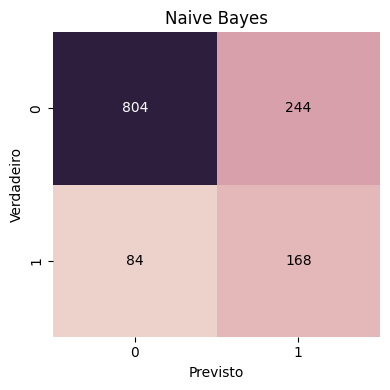

In [9]:
indice = 0
plot_confusion_matrix(y_teste,resultados[indice],nomes[indice])

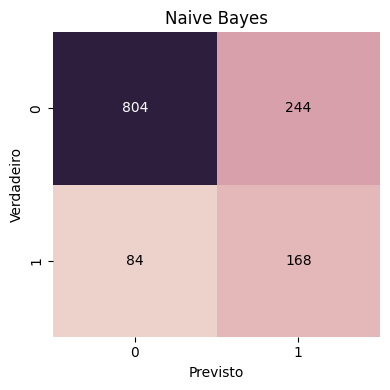

<Figure size 640x480 with 0 Axes>

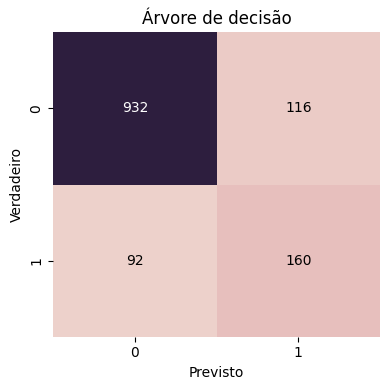

<Figure size 640x480 with 0 Axes>

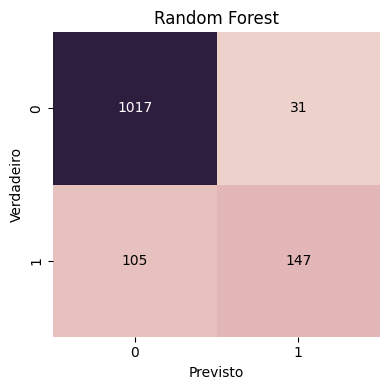

<Figure size 640x480 with 0 Axes>

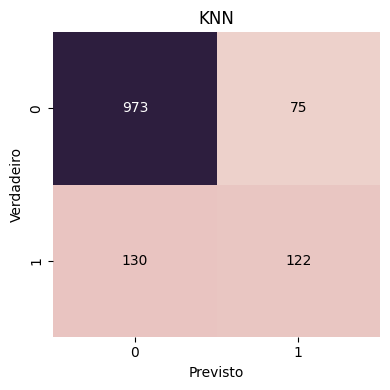

<Figure size 640x480 with 0 Axes>

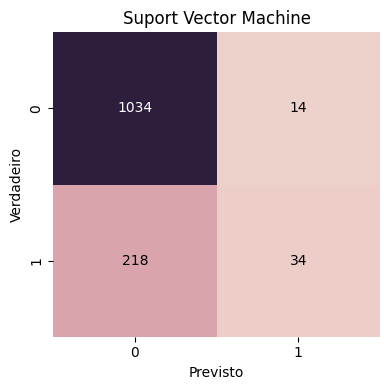

<Figure size 640x480 with 0 Axes>

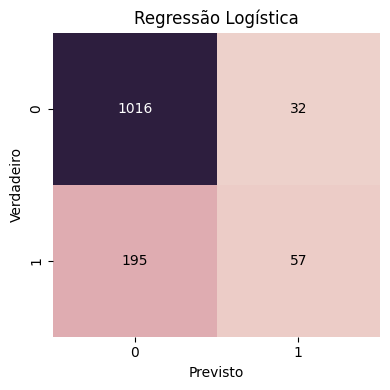

<Figure size 640x480 with 0 Axes>

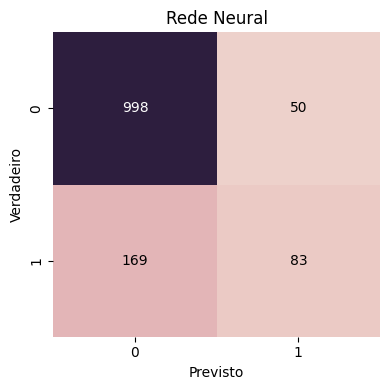

<Figure size 640x480 with 0 Axes>

In [10]:
for indice,item in enumerate(resultados):
    plot_confusion_matrix(y_teste,resultados[indice],nomes[indice])
    plt.savefig(f'{nomes[indice]}.jpg')
    

### Precision e Recall

A precisão averigua qual é a fração das vezes que o modelo classificou como positivo e estava correto

O Recall (sensibilidade) é a fração das vezes em que o valor era positivo e o modelo classificou corretamente

![Alt text](image-13.png)

In [11]:
from sklearn.metrics import precision_score,recall_score
precision_lista = []
recall_lista = []
for item in resultados:
    prec = precision_score(y_teste,item)
    reca = recall_score(y_teste,item)
    precision_lista.append(prec)
    recall_lista.append(reca)
df_results['Precision Score'] = precision_lista
df_results['Recall Score'] = recall_lista
df_results

,modelo,Accuracy Score,Precision Score,Recall Score
0,Naive Bayes,0.747692,0.407767,0.666667
1,Árvore de decisão,0.840000,0.579710,0.634921
2,Random Forest,0.895385,0.825843,0.583333
3,KNN,0.842308,0.619289,0.484127
4,Suport Vector Machine,0.821538,0.708333,0.134921
5,Regressão Logística,0.825385,0.640449,0.226190
6,Rede Neural,0.831538,0.624060,0.329365


### F1 Score

Nada mais é que uma média ponderada entre o Precision e o Recall

![Alt text](image-14.png)


In [12]:
from sklearn.metrics import f1_score
f1_score_lista = []
for item in resultados:
    f1 = f1_score(y_teste,item)
    f1_score_lista.append(f1)
df_results['F1 Score'] = f1_score_lista
df_results

,modelo,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Naive Bayes,0.747692,0.407767,0.666667,0.506024
1,Árvore de decisão,0.840000,0.579710,0.634921,0.606061
2,Random Forest,0.895385,0.825843,0.583333,0.683721
3,KNN,0.842308,0.619289,0.484127,0.543430
4,Suport Vector Machine,0.821538,0.708333,0.134921,0.226667
5,Regressão Logística,0.825385,0.640449,0.226190,0.334311
6,Rede Neural,0.831538,0.624060,0.329365,0.431169
